In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

In [155]:
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

### 2021년 상권 업종 별 추정 매출 데이터 가져오기

In [156]:
salary_2021 = pd.read_csv('./Data/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2021년.csv',encoding='euc-kr')
salary_2021.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2021,1,A,골목상권,1000001,계동길,CS100001,한식음식점,316763168,13820,...,204,6283,4828,402,2286,2963,2673,1717,1068,16
1,2021,1,A,골목상권,1000001,계동길,CS100002,중식음식점,39791852,2042,...,11,825,1041,243,629,307,322,269,97,1
2,2021,1,A,골목상권,1000001,계동길,CS100003,일식음식점,60325474,1563,...,136,519,635,0,185,339,242,279,112,2
3,2021,1,A,골목상권,1000001,계동길,CS100004,양식음식점,199448496,4442,...,66,1778,2175,31,1505,1155,439,566,256,3
4,2021,1,A,골목상권,1000001,계동길,CS100005,제과점,165688274,18512,...,676,7523,9187,208,2471,4577,3857,2990,2609,4


### 데이터 info 

In [157]:
# 전체 컬럼 맞게 들어가 있는지 확인
salary_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128703 entries, 0 to 128702
Data columns (total 80 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   기준_년_코드          128703 non-null  int64 
 1   기준_분기_코드         128703 non-null  int64 
 2   상권_구분_코드         128703 non-null  object
 3   상권_구분_코드_명       128703 non-null  object
 4   상권_코드            128703 non-null  int64 
 5   상권_코드_명          128703 non-null  object
 6   서비스_업종_코드        128703 non-null  object
 7   서비스_업종_코드_명      128703 non-null  object
 8   분기당_매출_금액        128703 non-null  int64 
 9   분기당_매출_건수        128703 non-null  int64 
 10  주중_매출_비율         128703 non-null  int64 
 11  주말_매출_비율         128703 non-null  int64 
 12  월요일_매출_비율        128703 non-null  int64 
 13  화요일_매출_비율        128703 non-null  int64 
 14  수요일_매출_비율        128703 non-null  int64 
 15  목요일_매출_비율        128703 non-null  int64 
 16  금요일_매출_비율        128703 non-null  int64 
 17  토요일_매출_비율 

In [158]:
# na 값 있는지 확인
salary_2021.isna().sum().sum()

0

In [159]:
# 대략적인 데이터 분포 확인하기
salary_2021.describe()

,기준_년_코드,기준_분기_코드,상권_코드,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
count,128703.0,128703.000000,1.287030e+05,1.287030e+05,1.287030e+05,128703.000000,128703.000000,128703.000000,128703.000000,128703.000000,...,128703.000000,1.287030e+05,1.287030e+05,128703.000000,1.287030e+05,1.287030e+05,1.287030e+05,1.287030e+05,1.287030e+05,128703.000000
mean,2021.0,2.492708,1.000779e+06,5.672014e+08,2.145016e+04,76.604158,23.483695,14.902900,15.013387,15.232450,...,1811.575969,1.102201e+04,9.531522e+03,353.273723,4.854337e+03,4.805921e+03,4.043129e+03,3.621689e+03,2.875179e+03,8.304608
std,0.0,1.116739,4.212456e+02,4.500312e+09,8.674978e+04,16.264685,16.277333,11.890384,11.764376,11.544117,...,8495.809922,4.467807e+04,4.103864e+04,2250.224617,2.321041e+04,2.141037e+04,1.656628e+04,1.453669e+04,1.837851e+04,63.430084
min,2021.0,1.000000,1.000001e+06,6.400000e+01,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2021.0,1.000000,1.000415e+06,2.352419e+07,4.360000e+02,67.000000,12.000000,10.000000,10.000000,11.000000,...,0.000000,2.010000e+02,1.630000e+02,0.000000,2.500000e+01,5.500000e+01,8.100000e+01,8.000000e+01,4.200000e+01,2.000000
50%,2021.0,2.000000,1.000818e+06,8.852903e+07,2.352000e+03,76.000000,24.000000,13.000000,14.000000,14.000000,...,25.000000,1.151000e+03,9.820000e+02,4.000000,2.480000e+02,3.890000e+02,4.650000e+02,4.720000e+02,2.850000e+02,4.000000
75%,2021.0,3.000000,1.001134e+06,3.296393e+08,1.273700e+04,89.000000,33.000000,18.000000,18.000000,18.000000,...,480.000000,6.165500e+03,5.569000e+03,89.000000,1.916000e+03,2.354000e+03,2.363000e+03,2.312000e+03,1.562000e+03,7.000000
max,2021.0,4.000000,1.001496e+06,4.619284e+11,4.964132e+06,100.000000,100.000000,100.000000,100.000000,100.000000,...,417681.000000,2.570529e+06,3.109243e+06,248274.000000,1.134235e+06,1.360332e+06,1.374407e+06,1.005005e+06,2.199444e+06,10121.000000


In [160]:
salary_2021.shape

(128703, 80)

### 나머지 데이터들도 이와 똑같이 해보기

In [161]:
salary_2020 = pd.read_csv('./Data/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2020년.csv',encoding='euc-kr')

# 전체 컬럼 맞게 들어가 있는지 확인
#print(salary_2020.info())

print(salary_2020.isna().sum().sum())

#print(salary_2020.describe())

print(salary_2020.shape)

0
(132321, 80)


In [162]:
salary_2019 = pd.read_csv('./Data/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2019년.csv',encoding='euc-kr')

print(salary_2019.isna().sum().sum())


print(salary_2019.shape)

0
(135578, 80)


In [163]:
salary_2018 = pd.read_csv('./Data/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2018년.csv',encoding='euc-kr')

print(salary_2018.isna().sum().sum())

print(salary_2018.shape)

0
(162666, 80)


In [164]:
salary_2017 = pd.read_csv('./Data/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2017년.csv',encoding='euc-kr')
test=salary_2017.isna().sum()
print(test[test == 0])

print(salary_2017.shape)

기준_년_코드            0
기준_분기_코드           0
상권_구분_코드           0
상권_구분_코드_명         0
상권_코드              0
                  ..
연령대_30_매출_건수       0
연령대_40_매출_건수       0
연령대_50_매출_건수       0
연령대_60_이상_매출_건수    0
점포수                0
Length: 80, dtype: int64
(166310, 80)


In [165]:
salary_2016 = pd.read_csv('./Data/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2016년.csv',encoding='euc-kr')

print(salary_2016.isna().sum().sum())

print(salary_2016.shape)

0
(166874, 80)


In [166]:
salary_2015 = pd.read_csv('./Data/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2015년.csv',encoding='euc-kr')

print(salary_2015.isna().sum().sum())

print(salary_2015.shape)

0
(164377, 80)


In [167]:
salary_2014 = pd.read_csv('./Data/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2014년.csv',encoding='euc-kr')

print(salary_2014.isna().sum().sum())

print(salary_2014.shape)

0
(162877, 80)


##### - 다행히도 null 값이 들어간 데이터가 없다. 다 붙이고 나서 타겟 데이터의 분포를 보도록 하자.

### 데이터 합치기

In [168]:
salary_2020.columns = salary_2014.columns
salary = pd.concat([salary_2014,salary_2015,salary_2016,salary_2017,salary_2018,salary_2019,salary_2020,salary_2021],ignore_index=True)
salary.shape

(1219706, 80)

In [169]:
import warnings
warnings.filterwarnings('ignore')

### 예측 가능한지 판단하기


1. 예측 가능한지 판단하기 위해 타겟 데이터인 분기당 매출 금액의 이상치를 제거하자

In [170]:
print(salary['분기당_매출_금액'].min(),'~',salary['분기당_매출_금액'].max())

### 범위가 말이 안된다 8원 판거니까 이상치를 일단 제거하자
target= salary['분기당_매출_금액']
target=target.dropna()

8 ~ 480608603539


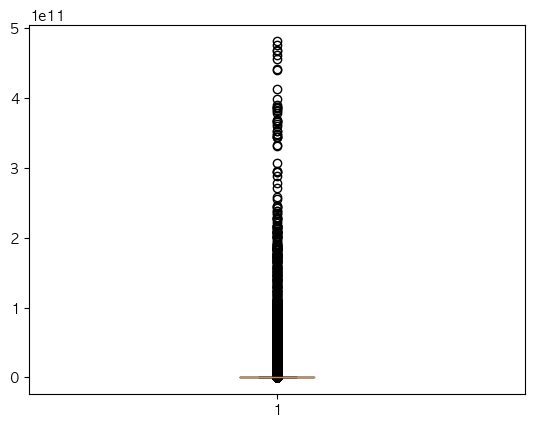

In [171]:
fig , ax = plt.subplots()

ax.boxplot(
    salary['분기당_매출_금액']
)

plt.show()

In [172]:
# 이상치 제거하기
oneq = target.quantile(0.25)
twoq = target.quantile(0.5)
threeq = target.quantile(0.75)

minus = twoq - oneq
plus = threeq - twoq

iqr = threeq-oneq

salary = salary[(salary['분기당_매출_금액'] <= (threeq + 1.5 * iqr + plus))  & (salary['분기당_매출_금액'] >= (oneq - 1.5 * iqr - minus))]


2) 분기당 매출 금액의 박스플롯 과 히스토그램 확인하기 <br><br>
    - 매출 금액의 범위가 너무 넓기 때문에 분포를 정확하기 어렵다고 느껴졌다. <br><br>
    - 표준화를 통해서 정확한 분포를 알아보려고 한다.

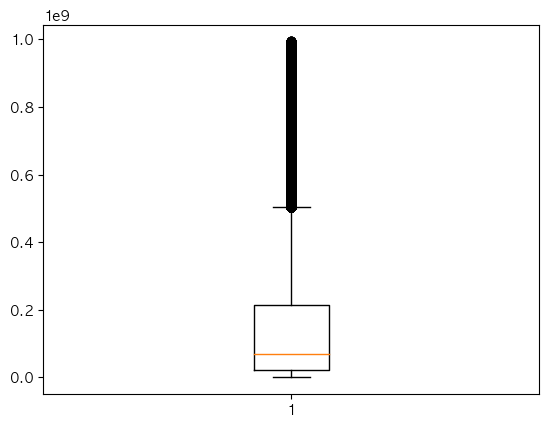

In [173]:
fig , ax = plt.subplots()

ax.boxplot(
    salary['분기당_매출_금액']
)

plt.show()

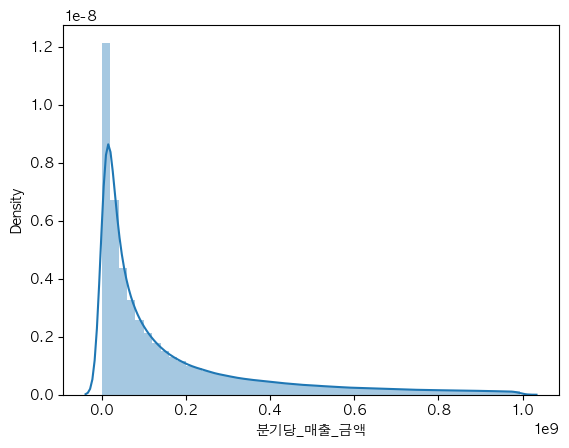

In [258]:
import seaborn as sns

sns.distplot(
    salary['분기당_매출_금액']
)

plt.show()